

Left Click to add a Helicopter, Right Click to add a Car


<IPython.core.display.Javascript object>


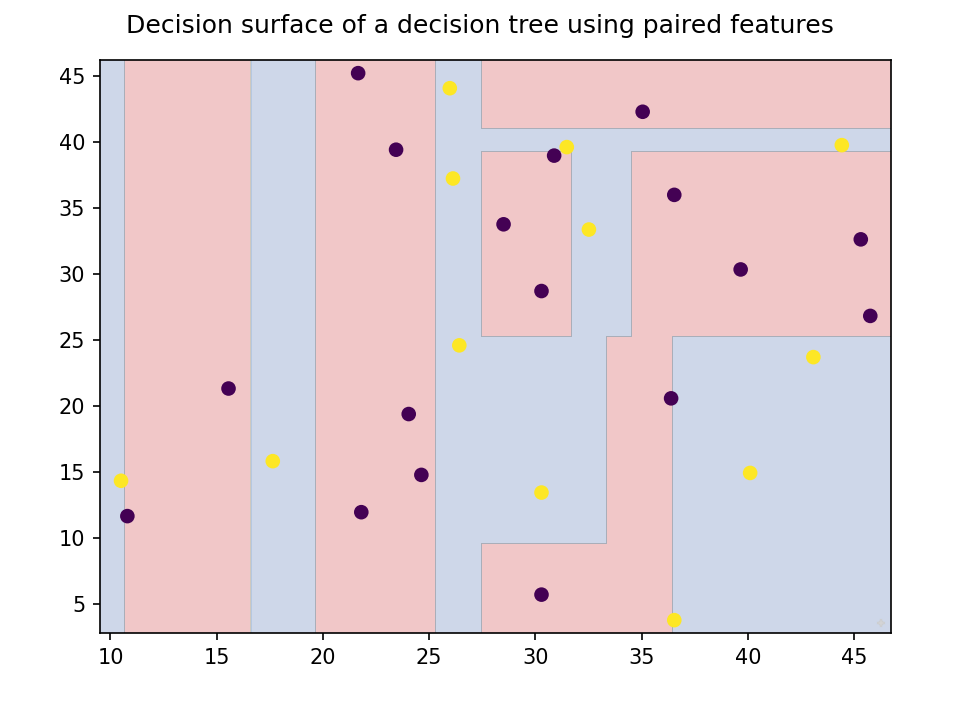

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.backend_bases import MouseButton
import pandas as pd


print("\n")                               
print("Left Click to add a Helicopter, Right Click to add a Car")

fig1, ax = plt.subplots()
ax.set_xlim(-5,51)
ax.set_ylim(-2,53)
img = plt.imread('Wales.png');

ax.imshow(img, extent=[-5, 51, -2, 53])
plt.axis("off")

coords = []

def Helicopter(event):
    
    if event.button == 1:
        x, y = event.xdata, event.ydata    
        global coords
        coords.append((x, y, 0))
        ax.scatter([x], [y], c='purple', s=25)
        fig1.draw()
    
    elif event.button == 3:
        x, y = event.xdata, event.ydata    
        coords.append((x, y, 1))
        ax.scatter([x], [y], c='yellow'
                   , s=25)
        fig1.draw()

cid = fig1.canvas.mpl_connect('button_press_event', Helicopter)
fig1.show()

In [2]:
coords

[(30.884425208682103, 38.972221919468474, 0),
 (36.53918711344401, 35.99603144327799, 0),
 (30.289187113444008, 28.704364776611328, 0),
 (39.664187113444, 30.341269538516087, 0),
 (28.503472827729723, 33.76388858613514, 0),
 (23.443949018205913, 39.41865049089704, 0),
 (21.65823473249163, 45.222221919468474, 0),
 (30.289187113444008, 13.426586241949174, 1),
 (26.420139494396388, 24.58730052766346, 1),
 (17.640377589634483, 15.807538622901554, 1),
 (24.634425208682103, 14.76587195623489, 0),
 (24.039187113444008, 19.378967194330126, 0),
 (32.52132997058686, 33.367062432425364, 1),
 (26.122520446777337, 37.236110051472984, 1),
 (44.426091875348774, 39.76587195623489, 1),
 (43.08680616106305, 23.694443384806313, 1),
 (10.497520446777344, 14.319443384806316, 1),
 (36.53918711344401, 3.7539671943301265, 1),
 (40.110615684872585, 14.914681480044411, 1),
 (30.289187113444008, 5.688491003853937, 0),
 (21.807044256301147, 11.938491003853937, 0),
 (10.795139494396388, 11.64087195623489, 0),
 (15

In [3]:
Coords_df = pd.DataFrame(coords,columns=['XPos','YPos','Type'])
print (Coords_df)

         XPos       YPos  Type
0   30.884425  38.972222     0
1   36.539187  35.996031     0
2   30.289187  28.704365     0
3   39.664187  30.341270     0
4   28.503473  33.763889     0
5   23.443949  39.418650     0
6   21.658235  45.222222     0
7   30.289187  13.426586     1
8   26.420139  24.587301     1
9   17.640378  15.807539     1
10  24.634425  14.765872     0
11  24.039187  19.378967     0
12  32.521330  33.367062     1
13  26.122520  37.236110     1
14  44.426092  39.765872     1
15  43.086806  23.694443     1
16  10.497520  14.319443     1
17  36.539187   3.753967     1
18  40.110616  14.914681     1
19  30.289187   5.688491     0
20  21.807044  11.938491     0
21  10.795139  11.640872     0
22  15.557044  21.313491     0
23  36.390378  20.569443     0
24  45.765378  26.819443     0
25  45.318949  32.623015     0
26  35.051092  42.295634     0
27  31.479663  39.617062     1
28  25.973711  44.081348     1


In [4]:
DT_X_Values = Coords_df.drop(['Type'],axis=1)
X = DT_X_Values.to_numpy().tolist()
X = np.array(X)

In [5]:
DT_Y_Values = Coords_df.drop(['XPos'],axis=1)
DT_Y_Values = DT_Y_Values.drop(['YPos'],axis=1)
y = DT_Y_Values.to_numpy().ravel()

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


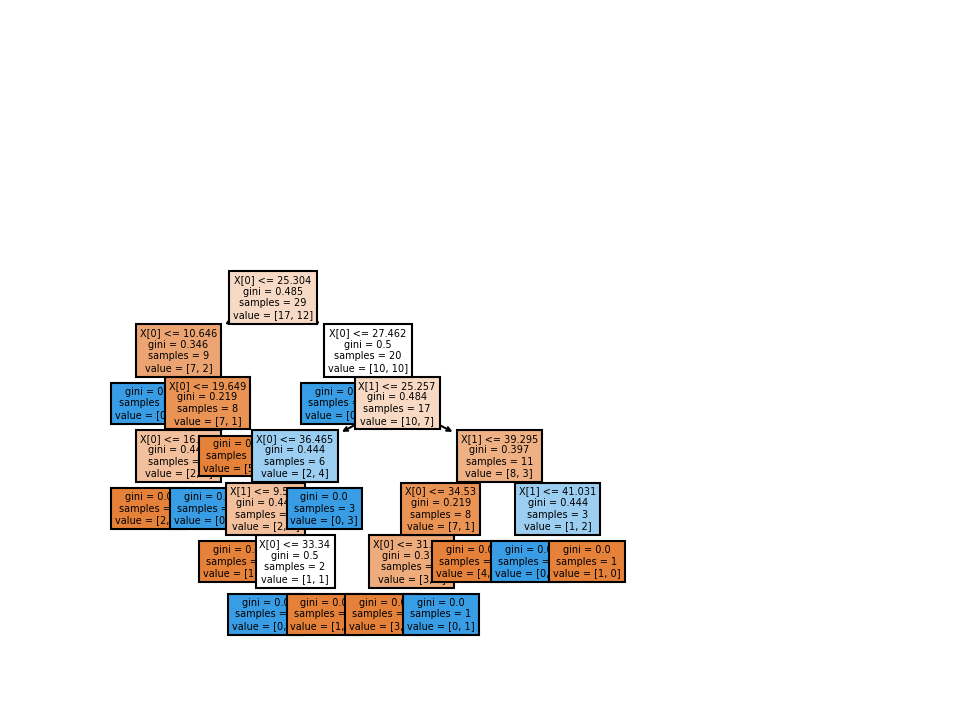

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

# Load data

clf = DecisionTreeClassifier().fit(X, y)

plt.subplot()

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha = 0.25)
plt.scatter(X[:, 0], X[:, 1], c = y)


plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(X, y)
plot_tree(clf, filled=True)
plt.show()